![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [188]:
# Import standard packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread 
from PIL import Image

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers, losses, metrics, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.layers import Dense, Dropout, Flatten

from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report,\
recall_score, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

np.random.seed(42)
%matplotlib inline

In [2]:
train_path = '../data/chest_xray/train/' 
test_path = '../data/chest_xray/test/'

In [3]:
idg = ImageDataGenerator(rescale=1/255, validation_split = 0.20)

train_set = idg.flow_from_directory(train_path, target_size=(128, 128),
                                    color_mode='grayscale', 
                                    class_mode='binary', 
                                    subset='training')

validation_set = idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', 
                                         class_mode='binary', 
                                         subset='validation')

test_set = idg.flow_from_directory(test_path, target_size=(128, 128), 
                                         color_mode='grayscale',class_mode='binary', shuffle=False)


Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [4]:
len(train_set)

131

In [151]:
def model_metrics(model):
    
    results = model.history
    
    train_loss = results.history['loss']
    train_acc = results.history['accuracy']
    train_recall = results.history['Recall']
    train_precision = results.history['Precision']
    
    val_loss = results.history['val_loss']
    val_acc = results.history['val_accuracy']
    val_recall = results.history['val_Recall']
    val_precision = results.history['val_Precision']
    
    print(f" AUC score of final epoch is {results.history['AUC'][-1]:.3f}")
    
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 6))
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label='train_loss')
    sns.lineplot(x=results.epoch, y=train_acc, ax=ax2, label='train_accuracy')
    sns.lineplot(x=results.epoch, y=train_recall, ax=ax3, label='train_recall')
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax4, label='train_precision')

    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label='val_loss')
    sns.lineplot(x=results.epoch, y=val_acc, ax=ax2, label='val_accuracy')
    sns.lineplot(x=results.epoch, y=val_recall, ax=ax3, label='val_recall')
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax4, label='val_precision')

    ax1.set_title('Loss')
    ax2.set_title('Accuracy')
    ax3.set_title('Recall')
    ax4.set_title('Precision')
    
    ax1.set_xlabel('Epochs')
    ax2.set_xlabel('Epochs')
    ax3.set_xlabel('Epochs')
    ax4.set_xlabel('Epochs')
    
    ax1.set_ylabel('Loss')
    ax2.set_ylabel('Accuracy')
    ax3.set_ylabel('Recall')
    ax4.set_ylabel('Precision')
    
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend();

NameError: name 'base_acc' is not defined

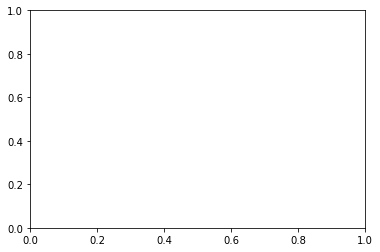

In [191]:
fig, ax = plt.subplots()

sns.barplot(base_acc, deep_cnn_acc)
sns.barplot(base_recall, deep_cnn_recall)
sns.barplot(base_precision, deep_cnn_precision)

ax1.set_title('Score Comparison')
ax1.set_xticklabels(['Baseline', 'Final Model'])
ax1.set_ylabel('Scores')
ax1.legend(['Accuracy', 'Recall', 'Precision'])
plt.savefig('Images/Comparison.png');

In [189]:
def conf_and_rocauc(model):
    
    #confusion matrix
    
    y_pred = model.predict(test_set)
    y_hat = (y_pred > 0.5)           
    display(ConfusionMatrixDisplay(confusion_matrix(test_set.classes, y_hat), display_labels=['Normal', 'Pneumonia']).plot());
    
    
    #ROC_AUC
    
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_set.classes, y_pred)
    auc_keras = auc(fpr_keras, tpr_keras)
    
    plt.figure()
    plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show();
    

## FSM

In [7]:
first_simple_model = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 1)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

first_simple_model.compile(optimizer='SGD',
                           loss='binary_crossentropy',
                           metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 
                                    'TrueNegatives', 'FalsePositives', 'FalseNegatives', 'AUC'])

2022-05-10 16:38:12.467596: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-10 16:38:12.468347: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 10. Tune using inter_op_parallelism_threads for best performance.


In [8]:
first_simple_model_results = first_simple_model.fit(train_set, 
                           epochs=20,
                           batch_size=None, 
                           verbose=3, 
                           validation_data=validation_set)

2022-05-10 16:38:26.545032: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:38:36.478424: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 123 of 131
2022-05-10 16:38:37.619760: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 131 steps, validate for 33 steps
Epoch 1/20


2022-05-10 16:38:49.156348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:38:59.154024: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:38:59.971685: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 2/20


2022-05-10 16:39:17.301785: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:39:27.370337: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:39:28.064746: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 3/20


2022-05-10 16:39:44.631887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 64 of 131
2022-05-10 16:39:54.508558: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:39:55.199837: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 4/20


2022-05-10 16:40:11.873658: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:40:21.846204: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:40:22.667532: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 5/20


2022-05-10 16:40:39.226787: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:40:49.176184: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:40:49.998263: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 6/20


2022-05-10 16:41:06.605821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:41:16.653062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:41:17.349062: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 7/20


2022-05-10 16:41:33.907590: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:41:43.857432: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:41:44.679361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 8/20


2022-05-10 16:42:01.234734: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:42:11.169452: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:42:11.985808: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 9/20


2022-05-10 16:42:28.486072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:42:38.509821: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:42:39.201053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 10/20


2022-05-10 16:42:55.713549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:43:05.679175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:43:06.496251: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 11/20


2022-05-10 16:43:23.002935: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:43:32.969904: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 124 of 131
2022-05-10 16:43:33.946242: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 12/20


2022-05-10 16:43:50.523570: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:44:00.474525: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:44:01.291839: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 13/20


2022-05-10 16:44:18.139666: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:44:28.066176: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 125 of 131
2022-05-10 16:44:28.883445: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 14/20


2022-05-10 16:44:45.453709: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:44:55.451587: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:44:56.142084: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 15/20


2022-05-10 16:45:12.643484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:45:22.662412: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:45:23.359670: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 16/20


2022-05-10 16:45:39.992511: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:45:49.993549: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:45:50.684807: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 17/20


2022-05-10 16:46:07.249186: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 64 of 131
2022-05-10 16:46:17.248562: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:46:17.944426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 18/20


2022-05-10 16:46:34.685741: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:46:44.621168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 123 of 131
2022-05-10 16:46:45.724021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 19/20


2022-05-10 16:47:02.248727: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:47:12.262681: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 124 of 131
2022-05-10 16:47:13.242083: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Epoch 20/20


2022-05-10 16:47:29.695635: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 63 of 131
2022-05-10 16:47:39.726756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 126 of 131
2022-05-10 16:47:40.417731: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


In [9]:
first_simple_model.save('../data/simple_model.h5')

In [10]:
#simple_model = models.load_model('../data/fsm.h5')

In [12]:
first_simple_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                524320    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 524,353
Trainable params: 524,353
Non-trainable params: 0
_________________________________________________________________


 AUC score of final epoch is 0.989


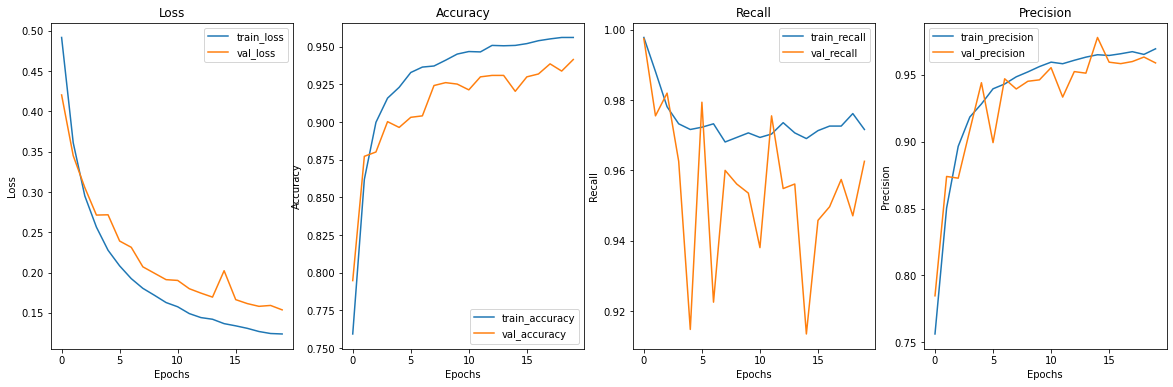

In [152]:
model_metrics(first_simple_model)

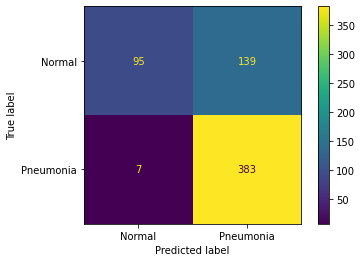

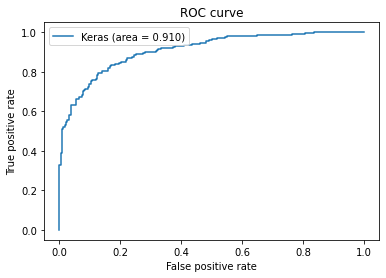

In [190]:
conf_and_rocauc(first_simple_model)

## FSM CV

In [197]:
idg_cv = ImageDataGenerator(rescale=1/255, validation_split = 0.20)

train_set_cv = idg_cv.flow_from_directory(train_path, target_size=(128, 128),
                                    color_mode='grayscale', 
                                    class_mode='binary',
                                    batch_size=4173,
                                    subset='training')

validation_set_cv = idg_cv.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', 
                                         class_mode='binary',
                                            batch_size=1043,
                                         subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [198]:
len(train_set_cv)

131

In [37]:
fsm_cv = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 1)),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

fsm_cv.compile(optimizer='SGD',
                           loss='binary_crossentropy',
                           metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 
                                    'TrueNegatives', 'FalsePositives', 'FalseNegatives', 'AUC'])

In [38]:
fsm_cv_results = fsm_cv.fit(train_set_cv, 
                           epochs=20, 
                           verbose=3, 
                           validation_data=validation_set_cv)

Train for 1 steps, validate for 1 steps
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20


In [206]:
fsm_cv_results.history['val_accuracy'][-1]

NameError: name 'fsm_cv_results' is not defined

 AUC score of final epoch is 0.763


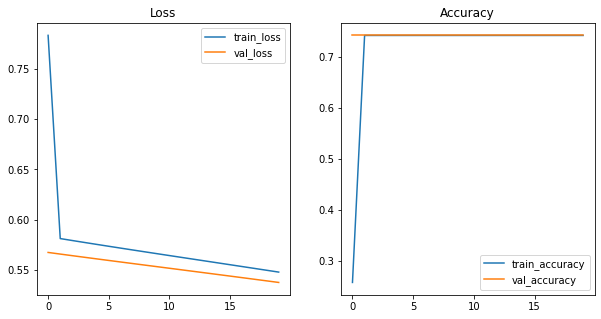

In [113]:
model_metrics(first_simple_model_cv)

In [47]:
fsm_cv.evaluate(test_set)

20/20 [==============================] - 3s 134ms/step - loss: 0.6637 - accuracy: 0.6250 - Recall: 1.0000 - Precision: 0.6250 - TruePositives: 390.0000 - TrueNegatives: 0.0000e+00 - FalsePositives: 234.0000 - FalseNegatives: 0.0000e+00 - AUC: 0.6735


[0.6637035652995109, 0.625, 1.0, 0.625, 390.0, 0.0, 234.0, 0.0, 0.67353714]

In [39]:
fsm_cv.save('../data/fsm_cv.h5')

In [203]:
idg_cv_comp = ImageDataGenerator(rescale=1/255)

train_set_cv_comp = idg_cv_comp.flow_from_directory(train_path, target_size=(128, 128),
                                    color_mode='grayscale', 
                                    class_mode='binary',
                                    batch_size=5216,
                                    subset='training')

Found 5216 images belonging to 2 classes.


In [41]:
def build_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(128, 128, 1)),
        layers.Dense(32, activation='sigmoid'),
        layers.Dense(1, activation='sigmoid')
])

    model.compile(optimizer='SGD',
                    loss='binary_crossentropy',
                    metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 
                            'TrueNegatives', 'FalsePositives', 'FalseNegatives', 'AUC'])
    return model

In [42]:
keras_model = scikit_learn.KerasClassifier(build_model,
                                          epochs=20)

In [204]:
train_images, train_labels = next(train_set_cv_comp)

print(len(train_images), len(train_labels))

5216 5216


In [207]:
type(train_images)

numpy.ndarray

In [43]:
cross_val_score(keras_model, train_images, train_labels, cv=5, verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 3338 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV] END ................................ score: (test=0.952) total time=  21.8s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.8s remaining:    0.0s


Train on 3338 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV] END ................................ score: (test=0.946) total time=  19.8s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   41.5s remaining:    0.0s


Train on 3338 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV] END ................................ score: (test=0.947) total time=  20.5s
Train on 3339 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV] END ................................ score: (test=0.948) total time=  20.4s
Train on 3339 samples
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV] END ................................ score: (test=0.956) total time=  20.4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


array([0.95209581, 0.9461078 , 0.94730538, 0.94844127, 0.95563549])

In [88]:
np.mean([0.95209581, 0.9461078 , 0.94730538, 0.94844127, 0.95563549])

0.9499171499999999

## Augmentation

In [89]:
train_idg = ImageDataGenerator(rescale=1/255,
                               validation_split = 0.20,
                               rotation_range=40, 
                               width_shift_range=0.2, 
                               height_shift_range=0.2, 
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
                                   

train_set_aug = train_idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='training')

validation_set_aug = train_idg.flow_from_directory(train_path, target_size=(128, 128), 
                                         color_mode='grayscale', class_mode='binary', subset='validation')

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [93]:
deep_cnn = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.25),
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1, activation='sigmoid')
])

deep_cnn.compile(optimizer='Adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'Recall', 'Precision', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives', 'AUC'])

deep_cnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 57600)            

In [94]:
deep_cnn_results = deep_cnn.fit(train_set_aug, 
                                epochs=200, 
                                batch_size=None, 
                                validation_data=validation_set_aug)

2022-05-11 09:46:32.423926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-11 09:46:42.517625: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131
2022-05-11 09:46:48.222077: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 131 steps, validate for 33 steps
Epoch 1/200


2022-05-11 09:47:00.299870: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 50 of 131
2022-05-11 09:47:10.419187: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 102 of 131
2022-05-11 09:47:16.115593: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 304s 2s/step - loss: 0.7279 - accuracy: 0.7043 - Recall: 0.9255 - Precision: 0.7410 - TruePositives: 2869.0000 - TrueNegatives: 70.0000 - FalsePositives: 1003.0000 - FalseNegatives: 231.0000 - AUC: 0.5038 - val_loss: 0.6365 - val_accuracy: 0.7430 - val_Recall: 1.0000 - val_Precision: 0.7430 - val_TruePositives: 775.0000 - val_TrueNegatives: 0.0000e+00 - val_FalsePositives: 268.0000 - val_FalseNegatives: 0.0000e+00 - val_AUC: 0.5708
Epoch 2/200


2022-05-11 09:52:02.674694: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 09:52:12.803756: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 101 of 131
2022-05-11 09:52:18.758128: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 306s 2s/step - loss: 0.5941 - accuracy: 0.7386 - Recall: 0.9661 - Precision: 0.7523 - TruePositives: 2995.0000 - TrueNegatives: 87.0000 - FalsePositives: 986.0000 - FalseNegatives: 105.0000 - AUC: 0.6029 - val_loss: 0.5476 - val_accuracy: 0.7430 - val_Recall: 1.0000 - val_Precision: 0.7430 - val_TruePositives: 775.0000 - val_TrueNegatives: 0.0000e+00 - val_FalsePositives: 268.0000 - val_FalseNegatives: 0.0000e+00 - val_AUC: 0.6937
Epoch 3/200


2022-05-11 09:57:08.467396: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 09:57:18.554223: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 101 of 131
2022-05-11 09:57:24.508965: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 304s 2s/step - loss: 0.5244 - accuracy: 0.7441 - Recall: 0.9619 - Precision: 0.7584 - TruePositives: 2982.0000 - TrueNegatives: 123.0000 - FalsePositives: 950.0000 - FalseNegatives: 118.0000 - AUC: 0.7433 - val_loss: 0.5403 - val_accuracy: 0.7373 - val_Recall: 0.9923 - val_Precision: 0.7416 - val_TruePositives: 769.0000 - val_TrueNegatives: 0.0000e+00 - val_FalsePositives: 268.0000 - val_FalseNegatives: 6.0000 - val_AUC: 0.7026
Epoch 4/200


2022-05-11 10:02:12.318464: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 10:02:22.432069: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 101 of 131
2022-05-11 10:02:28.397462: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 307s 2s/step - loss: 0.5097 - accuracy: 0.7381 - Recall: 0.9503 - Precision: 0.7583 - TruePositives: 2946.0000 - TrueNegatives: 134.0000 - FalsePositives: 939.0000 - FalseNegatives: 154.0000 - AUC: 0.7559 - val_loss: 0.5426 - val_accuracy: 0.7421 - val_Recall: 0.9987 - val_Precision: 0.7428 - val_TruePositives: 774.0000 - val_TrueNegatives: 0.0000e+00 - val_FalsePositives: 268.0000 - val_FalseNegatives: 1.0000 - val_AUC: 0.6959
Epoch 5/200


2022-05-11 10:07:19.786333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 10:07:29.731944: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131
2022-05-11 10:07:35.947787: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 303s 2s/step - loss: 0.4876 - accuracy: 0.7462 - Recall: 0.9548 - Precision: 0.7631 - TruePositives: 2960.0000 - TrueNegatives: 154.0000 - FalsePositives: 919.0000 - FalseNegatives: 140.0000 - AUC: 0.7783 - val_loss: 0.5426 - val_accuracy: 0.7143 - val_Recall: 0.9110 - val_Precision: 0.7551 - val_TruePositives: 706.0000 - val_TrueNegatives: 39.0000 - val_FalsePositives: 229.0000 - val_FalseNegatives: 69.0000 - val_AUC: 0.7057
Epoch 6/200


2022-05-11 10:12:22.729058: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 10:12:32.672018: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131
2022-05-11 10:12:38.885190: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 307s 2s/step - loss: 0.4920 - accuracy: 0.7472 - Recall: 0.9361 - Precision: 0.7720 - TruePositives: 2902.0000 - TrueNegatives: 216.0000 - FalsePositives: 857.0000 - FalseNegatives: 198.0000 - AUC: 0.7781 - val_loss: 0.5308 - val_accuracy: 0.7411 - val_Recall: 0.9716 - val_Precision: 0.7522 - val_TruePositives: 753.0000 - val_TrueNegatives: 20.0000 - val_FalsePositives: 248.0000 - val_FalseNegatives: 22.0000 - val_AUC: 0.7105
Epoch 7/200


2022-05-11 10:17:29.804209: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-11 10:17:39.817273: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131
2022-05-11 10:17:46.719506: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 305s 2s/step - loss: 0.4799 - accuracy: 0.7493 - Recall: 0.9381 - Precision: 0.7730 - TruePositives: 2908.0000 - TrueNegatives: 219.0000 - FalsePositives: 854.0000 - FalseNegatives: 192.0000 - AUC: 0.7860 - val_loss: 0.5326 - val_accuracy: 0.7402 - val_Recall: 0.9626 - val_Precision: 0.7551 - val_TruePositives: 746.0000 - val_TrueNegatives: 26.0000 - val_FalsePositives: 242.0000 - val_FalseNegatives: 29.0000 - val_AUC: 0.7044
Epoch 8/200


2022-05-11 10:22:34.809887: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 10:22:44.773390: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131
2022-05-11 10:22:50.988968: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 304s 2s/step - loss: 0.4688 - accuracy: 0.7486 - Recall: 0.9252 - Precision: 0.7783 - TruePositives: 2868.0000 - TrueNegatives: 256.0000 - FalsePositives: 817.0000 - FalseNegatives: 232.0000 - AUC: 0.7964 - val_loss: 0.5313 - val_accuracy: 0.7459 - val_Recall: 0.9742 - val_Precision: 0.7550 - val_TruePositives: 755.0000 - val_TrueNegatives: 23.0000 - val_FalsePositives: 245.0000 - val_FalseNegatives: 20.0000 - val_AUC: 0.7218
Epoch 9/200


2022-05-11 10:27:39.072119: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 49 of 131
2022-05-11 10:27:49.025929: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 100 of 131
2022-05-11 10:27:55.237598: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 324s 2s/step - loss: 0.4655 - accuracy: 0.7515 - Recall: 0.9281 - Precision: 0.7795 - TruePositives: 2877.0000 - TrueNegatives: 259.0000 - FalsePositives: 814.0000 - FalseNegatives: 223.0000 - AUC: 0.8042 - val_loss: 0.5277 - val_accuracy: 0.7469 - val_Recall: 0.9987 - val_Precision: 0.7464 - val_TruePositives: 774.0000 - val_TrueNegatives: 5.0000 - val_FalsePositives: 263.0000 - val_FalseNegatives: 1.0000 - val_AUC: 0.7489
Epoch 10/200


2022-05-11 10:33:03.405924: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-11 10:33:13.336696: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 96 of 131
2022-05-11 10:33:20.603486: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 313s 2s/step - loss: 0.4545 - accuracy: 0.7745 - Recall: 0.8932 - Precision: 0.8195 - TruePositives: 2769.0000 - TrueNegatives: 463.0000 - FalsePositives: 610.0000 - FalseNegatives: 331.0000 - AUC: 0.8257 - val_loss: 0.5071 - val_accuracy: 0.7507 - val_Recall: 0.9974 - val_Precision: 0.7498 - val_TruePositives: 773.0000 - val_TrueNegatives: 10.0000 - val_FalsePositives: 258.0000 - val_FalseNegatives: 2.0000 - val_AUC: 0.7715
Epoch 11/200


2022-05-11 10:38:16.507876: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-11 10:38:26.356096: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131
2022-05-11 10:38:33.399286: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 319s 2s/step - loss: 0.4439 - accuracy: 0.7958 - Recall: 0.9145 - Precision: 0.8285 - TruePositives: 2835.0000 - TrueNegatives: 486.0000 - FalsePositives: 587.0000 - FalseNegatives: 265.0000 - AUC: 0.8457 - val_loss: 0.5269 - val_accuracy: 0.7766 - val_Recall: 0.8994 - val_Precision: 0.8181 - val_TruePositives: 697.0000 - val_TrueNegatives: 113.0000 - val_FalsePositives: 155.0000 - val_FalseNegatives: 78.0000 - val_AUC: 0.7882
Epoch 12/200


2022-05-11 10:43:35.392622: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-11 10:43:45.415930: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131
2022-05-11 10:43:52.435651: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 324s 2s/step - loss: 0.4087 - accuracy: 0.8215 - Recall: 0.9010 - Precision: 0.8644 - TruePositives: 2793.0000 - TrueNegatives: 635.0000 - FalsePositives: 438.0000 - FalseNegatives: 307.0000 - AUC: 0.8733 - val_loss: 0.4658 - val_accuracy: 0.8025 - val_Recall: 0.9794 - val_Precision: 0.7998 - val_TruePositives: 759.0000 - val_TrueNegatives: 78.0000 - val_FalsePositives: 190.0000 - val_FalseNegatives: 16.0000 - val_AUC: 0.8661
Epoch 13/200


2022-05-11 10:48:59.864094: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-11 10:49:09.813168: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 96 of 131
2022-05-11 10:49:17.115453: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 313s 2s/step - loss: 0.4045 - accuracy: 0.8323 - Recall: 0.9003 - Precision: 0.8771 - TruePositives: 2791.0000 - TrueNegatives: 682.0000 - FalsePositives: 391.0000 - FalseNegatives: 309.0000 - AUC: 0.8783 - val_loss: 0.4527 - val_accuracy: 0.7709 - val_Recall: 0.7677 - val_Precision: 0.9098 - val_TruePositives: 595.0000 - val_TrueNegatives: 209.0000 - val_FalsePositives: 59.0000 - val_FalseNegatives: 180.0000 - val_AUC: 0.8636
Epoch 14/200


2022-05-11 10:54:12.566503: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-11 10:54:22.606348: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131
2022-05-11 10:54:29.375677: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 311s 2s/step - loss: 0.3753 - accuracy: 0.8404 - Recall: 0.9032 - Precision: 0.8844 - TruePositives: 2800.0000 - TrueNegatives: 707.0000 - FalsePositives: 366.0000 - FalseNegatives: 300.0000 - AUC: 0.8976 - val_loss: 0.3809 - val_accuracy: 0.8437 - val_Recall: 0.8968 - val_Precision: 0.8933 - val_TruePositives: 695.0000 - val_TrueNegatives: 185.0000 - val_FalsePositives: 83.0000 - val_FalseNegatives: 80.0000 - val_AUC: 0.8987
Epoch 15/200


2022-05-11 10:59:23.218941: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 47 of 131
2022-05-11 10:59:33.241714: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 97 of 131
2022-05-11 10:59:40.280221: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 312s 2s/step - loss: 0.3662 - accuracy: 0.8517 - Recall: 0.9055 - Precision: 0.8959 - TruePositives: 2807.0000 - TrueNegatives: 747.0000 - FalsePositives: 326.0000 - FalseNegatives: 293.0000 - AUC: 0.9046 - val_loss: 0.4112 - val_accuracy: 0.8198 - val_Recall: 0.8568 - val_Precision: 0.8961 - val_TruePositives: 664.0000 - val_TrueNegatives: 191.0000 - val_FalsePositives: 77.0000 - val_FalseNegatives: 111.0000 - val_AUC: 0.8876
Epoch 16/200


2022-05-11 11:04:35.143384: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-11 11:04:45.015637: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 96 of 131
2022-05-11 11:04:52.220946: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 318s 2s/step - loss: 0.3653 - accuracy: 0.8533 - Recall: 0.9090 - Precision: 0.8952 - TruePositives: 2818.0000 - TrueNegatives: 743.0000 - FalsePositives: 330.0000 - FalseNegatives: 282.0000 - AUC: 0.9055 - val_loss: 0.4112 - val_accuracy: 0.8255 - val_Recall: 0.9535 - val_Precision: 0.8350 - val_TruePositives: 739.0000 - val_TrueNegatives: 122.0000 - val_FalsePositives: 146.0000 - val_FalseNegatives: 36.0000 - val_AUC: 0.8798
Epoch 17/200


2022-05-11 11:09:53.208193: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-11 11:10:03.138809: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 98 of 131
2022-05-11 11:10:09.839782: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


131/131 [==============================] - 323s 2s/step - loss: 0.3572 - accuracy: 0.8562 - Recall: 0.9039 - Precision: 0.9027 - TruePositives: 2802.0000 - TrueNegatives: 771.0000 - FalsePositives: 302.0000 - FalseNegatives: 298.0000 - AUC: 0.9100 - val_loss: 0.4056 - val_accuracy: 0.8389 - val_Recall: 0.8929 - val_Precision: 0.8906 - val_TruePositives: 692.0000 - val_TrueNegatives: 183.0000 - val_FalsePositives: 85.0000 - val_FalseNegatives: 83.0000 - val_AUC: 0.8801
Epoch 18/200


2022-05-11 11:15:16.613543: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 48 of 131
2022-05-11 11:15:26.684206: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 99 of 131
2022-05-11 11:15:33.203942: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


118/131 [==========================>...] - ETA: 29s - loss: 0.3142 - accuracy: 0.8789 - Recall: 0.9090 - Precision: 0.9267 - TruePositives: 2516.0000 - TrueNegatives: 758.0000 - FalsePositives: 199.0000 - FalseNegatives: 252.0000 - AUC: 0.9325

KeyboardInterrupt: 

In [ ]:
deep_cnn.save('../data/deep_cnn.h5')

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***